<a href="https://colab.research.google.com/github/pavanraja753/Advanced-Topics-in-Artificial-Intelligence/blob/main/Object_detection_model_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless==4.5.4.60 fiftyone

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_name="evaluate-detections-tutorial",
)
dataset.persistent = True

In [2]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

# Images
img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: requests>=2.23.0 not found and is required by YOLOv5, attempting auto-update...

requirements: 2 packages updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-2-2 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 1 tie
Speed: 117.3ms pre-process, 209.9ms inference, 43.4ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
# Print some information about the dataset
print(dataset)

In [ ]:
# Print a ground truth detection
sample = dataset.first()
print(sample.ground_truth.detections[0])

In [ ]:
session = fo.launch_app(dataset)

In [49]:
# Choose a random subset of 100 samples to add predictions to
predictions_view = dataset.take(100, seed=51)

In [52]:
from fiftyone.core.labels import Label
from torch._C import dtype
from PIL import Image
from torchvision.transforms import functional as func

import fiftyone as fo

# Get class list
classes = dataset.default_classes

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model(sample.filepath)
        results = preds
#        labels = preds["labels"].cpu().detach().numpy()
#        scores = preds["scores"].cpu().detach().numpy()
#        boxes = preds["boxes"].cpu().detach().numpy()

        boxes=results.xyxy[0][:,:4].cpu().detach().numpy()
        scores=results.xyxy[0][:,4:5].cpu().detach().numpy()
        labels=results.xyxy[0][:,5:].cpu().detach().numpy().astype('int')
        labels = labels.flatten()
        scores = scores.flatten()
        print(labels)
        print(scores)
        print(boxes)
        print("----")
        print(labels.shape)
        print(scores.shape)
        print(boxes.shape)



        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]
            label = int(label)

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["YOLOv5"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

   0% ||----------------|   0/100 [40.1ms elapsed, ? remaining, ? samples/s] 

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 31]
[    0.88807      0.5638]
[[     133.85      200.65       275.4      325.88]
 [     134.55      332.57      186.22      364.05]]
----
(2,)
(2,)
(2, 4)
   1% |/----------------|   1/100 [410.1ms elapsed, 40.6s remaining, 2.4 samples/s] 

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[2 2 0 5]
[    0.91519     0.86321     0.60978     0.60207]
[[    0.30307      211.33      239.53       350.2]
 [     544.65      204.42      639.55      426.85]
 [    0.13937      226.57      30.255      261.51]
 [     170.68      101.57      561.51       299.1]]
----
(4,)
(4,)
(4, 4)
   2% |-----------------|   2/100 [763.4ms elapsed, 37.4s remaining, 2.6 samples/s] 

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[19 19 19 19 19 19 19 19 19 19 19 19]
[    0.86563     0.84879     0.83798     0.83226     0.82491     0.77894     0.76916     0.76653     0.74991     0.70699     0.67153     0.53807]
[[     21.543      136.86      323.58      278.78]
 [      180.7     0.15017      250.45       34.16]
 [     308.05      117.04      452.88       210.4]
 [     129.66      11.284      209.12      54.194]
 [      413.7      172.25      580.58      308.12]
 [     39.955       44.46      180.21      94.827]
 [   0.088861           0      24.443      23.404]
 [     145.24      205.32      393.85      405.74]
 [     441.11      103.34      570.49      185.12]
 [     34.785      25.427      133.91       66.71]
 [     54.316      95.358      237.78      153.84]
 [     246.85      198.68      430.54      377.74]]
----
(12,)
(12,)
(12, 4)
   3% |\----------------|   3/100 [1.2s elapsed, 37.5s remaining, 2.6 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[41 39 61 15 41 71 61 41]
[    0.75785     0.60733     0.55267     0.53503     0.52571     0.45172     0.38423     0.30797]
[[      261.2      3.1358      316.25      94.566]
 [     111.45       25.64       171.2      137.68]
 [    0.25445      236.61      35.046       416.1]
 [     201.16      112.59      460.44      256.95]
 [     304.85       1.833       359.8      68.823]
 [     172.93      110.66      462.23       259.9]
 [     78.864      322.79      208.76      420.51]
 [     112.59      33.919       171.1      135.79]]
----
(8,)
(8,)
(8, 4)
   4% ||----------------|   4/100 [1.5s elapsed, 36.2s remaining, 2.6 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[2 2 3 2 2 0 2 2 2 2 2 0]
[    0.82747      0.7713     0.75715     0.73686      0.6016     0.58726     0.55759     0.40269     0.38247     0.36246     0.29185     0.25985]
[[     247.03      312.63      443.03      430.28]
 [    0.22885      366.93        92.4      458.37]
 [          0       408.6      347.54      629.15]
 [      34.81      320.52       196.2      383.62]
 [     166.88      327.91      271.28      396.89]
 [    0.20372      302.56      19.378      365.28]
 [     428.88      322.31      479.89      419.75]
 [     135.87      315.91      206.84      342.82]
 [     216.85      326.23      281.75      350.17]
 [     31.746      305.62      71.176      322.91]
 [     13.203      309.72      73.119      363.84]
 [     318.11      334.33      335.05      351.36]]
----
(12,)
(12,)
(12, 4)
   5% |/----------------|   5/100 [1.9s elapsed, 36.1s remaining, 2.6 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0 38]
[    0.93132     0.91787     0.84785]
[[     362.26      22.814      471.44      137.59]
 [     311.33       98.13      397.01      327.77]
 [     362.18      210.46      397.51      288.41]]
----
(3,)
(3,)
(3, 4)
   6% |█----------------|   6/100 [2.3s elapsed, 35.4s remaining, 2.7 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[63  0]
[    0.49263     0.31081]
[[    0.47991       35.72      363.58         375]
 [     217.67      163.22      496.41         375]]
----
(2,)
(2,)
(2, 4)
   7% |█\---------------|   7/100 [2.6s elapsed, 34.7s remaining, 2.7 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[0 0 0]
[    0.70984     0.69677     0.34118]
[[          0      8.5199      331.26      619.12]
 [   0.033794     0.47613      65.716      184.12]
 [     296.54           0         334      208.23]]
----
(3,)
(3,)
(3, 4)
   8% |█|---------------|   8/100 [2.9s elapsed, 33.2s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[43 65 56 15]
[    0.42265     0.39276     0.30308     0.27625]
[[     377.62      128.87      509.85      273.37]
 [     379.06      129.01       509.2      273.49]
 [     458.51           0      638.95      84.606]
 [     7.8548      6.1805      611.62      351.27]]
----
(4,)
(4,)
(4, 4)
   9% |█/---------------|   9/100 [3.2s elapsed, 32.2s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[23]
[    0.78795]
[[     172.96      38.267      389.38      607.36]]
----
(1,)
(1,)
(1, 4)
  10% |█----------------|  10/100 [3.6s elapsed, 31.9s remaining, 2.9 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[15 61]
[    0.71142     0.48551]
[[     185.95      173.58      497.22      474.04]
 [     279.47      244.07      537.74         480]]
----
(2,)
(2,)
(2, 4)
  11% |█\---------------|  11/100 [3.9s elapsed, 31.7s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 36  2  1  1]
[     0.9121     0.88109     0.87743     0.75381     0.68802]
[[     308.84       74.15      420.87      391.73]
 [     292.39       306.3      415.49      419.18]
 [     1.1376           0      367.64      196.99]
 [     409.23      23.366       592.7      192.66]
 [     586.72      22.047         640      149.45]]
----
(5,)
(5,)
(5, 4)
  12% |██|--------------|  12/100 [4.3s elapsed, 31.5s remaining, 2.9 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[56 41 56 75 56 41 41 57 60 56 73 41 73 73 73 58 73 73 73  1 45]
[    0.85714     0.76258     0.76022     0.72211     0.63755     0.50605     0.50226     0.43781      0.4239     0.37914     0.36017     0.35231     0.33193     0.32696     0.31782     0.31658     0.31302     0.29589     0.28077     0.27812      0.2646]
[[     455.75      269.79         640      475.94]
 [     328.42      221.74      353.92      251.49]
 [     466.64      161.77      593.32      329.68]
 [     359.38      139.17      384.04      214.17]
 [     202.11      301.24      553.38      478.57]
 [     366.31      231.21      394.79       256.9]
 [     438.16      191.26      455.58      208.82]
 [     199.97      299.82       554.5         477]
 [     301.45      187.68      494.66       359.5]
 [     233.99      246.79      318.83      340.78]
 [     622.24      166.18      636.83      206.77]
 [     411.38      231.16      439.92      255.16]
 [      593.3      160.48      603.95      198.05]
 [     589.91     

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[6 0]
[    0.61168     0.41819]
[[          0     0.66513         640      279.87]
 [     545.47      29.144      571.11      87.079]]
----
(2,)
(2,)
(2, 4)
  14% |██---------------|  14/100 [5.1s elapsed, 31.0s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[18 19 18  0]
[     0.8927     0.83776     0.80846     0.68423]
[[    0.27562      249.45      75.979      347.06]
 [     302.29      133.87      476.47      334.64]
 [     104.18         221      173.87      289.43]
 [     395.04       97.15      489.32      176.62]]
----
(4,)
(4,)
(4, 4)
  15% |██\--------------|  15/100 [5.4s elapsed, 30.5s remaining, 2.9 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[10  0  2]
[    0.87823      0.8448     0.42013]
[[      90.22      190.21      171.59      323.81]
 [     248.29      178.84      284.21      258.91]
 [     77.699       200.8      90.019      210.45]]
----
(3,)
(3,)
(3, 4)
  16% |██|--------------|  16/100 [5.7s elapsed, 29.8s remaining, 2.9 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[12 25 12 58 25 56]
[    0.89404     0.63258     0.55144     0.32332     0.30104     0.29859]
[[     0.4832      200.84       107.7         480]
 [     451.52      303.71       585.5      352.79]
 [     143.69      382.36      162.94      427.84]
 [     140.13      274.49      188.91      311.74]
 [     451.34      302.32      585.78      411.94]
 [     429.61      424.22      504.82         480]]
----
(6,)
(6,)
(6, 4)
  17% |██/--------------|  17/100 [6.1s elapsed, 29.6s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 36]
[    0.87572     0.74761]
[[     194.15      40.473      279.83      210.88]
 [     189.88      127.29      230.39      214.88]]
----
(2,)
(2,)
(2, 4)
  18% |███--------------|  18/100 [6.4s elapsed, 29.2s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 13]
[    0.90405     0.40704]
[[     165.37      57.027       286.5      132.13]
 [     43.685      267.44      409.01      620.73]]
----
(2,)
(2,)
(2, 4)
  19% |███\-------------|  19/100 [6.7s elapsed, 28.8s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[23 23]
[    0.46057     0.28558]
[[     146.99      111.59      385.58      637.18]
 [     42.108      339.24      212.48         590]]
----
(2,)
(2,)
(2, 4)
  20% |███|-------------|  20/100 [7.1s elapsed, 28.4s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 16]
[    0.39784      0.3583]
[[     50.911      35.192      520.86         640]
 [     77.052      317.92      327.02      607.35]]
----
(2,)
(2,)
(2, 4)
  21% |███/-------------|  21/100 [7.5s elapsed, 28.2s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 32 34 39 39  0]
[     0.8563     0.83089      0.8226     0.66495     0.28036      0.2798]
[[     314.19      203.07      467.46      422.41]
 [      549.1      174.25       576.5      204.35]
 [     460.12       318.1      542.31      383.23]
 [     564.69      217.19      576.58      257.59]
 [     506.95      215.23      528.99      259.78]
 [     479.67      142.21      524.33      258.55]]
----
(6,)
(6,)
(6, 4)
  22% |███--------------|  22/100 [7.8s elapsed, 27.7s remaining, 2.9 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 41]
[     0.4751     0.31365]
[[     3.1739      8.0615       437.2       478.2]
 [     341.99       400.6      427.82      478.82]]
----
(2,)
(2,)
(2, 4)
  23% |███\-------------|  23/100 [8.2s elapsed, 27.4s remaining, 2.9 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[21 18 18]
[    0.88626      0.8351     0.74179]
[[     450.91      304.43      533.22      371.68]
 [     67.558      288.73      138.63      325.92]
 [     110.79      246.33       169.3      285.27]]
----
(3,)
(3,)
(3, 4)
  24% |████|------------|  24/100 [8.6s elapsed, 27.1s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[2 3 0 7 5]
[    0.82986     0.60682     0.58411     0.57299     0.50566]
[[    0.42671      239.76      246.07      478.95]
 [     475.37      266.61      569.44      411.86]
 [     472.01       196.1      569.12      373.13]
 [      551.3      173.23      639.08      475.37]
 [          0      103.84      471.61      325.81]]
----
(5,)
(5,)
(5, 4)
  25% |████/------------|  25/100 [9.0s elapsed, 26.9s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 77  0 79]
[    0.75461     0.61721     0.49047     0.31221]
[[     320.38      44.421      631.12      386.29]
 [     130.67      197.46      320.61      385.02]
 [     57.326      18.527      306.67      389.04]
 [     519.63      283.98      592.87      354.02]]
----
(4,)
(4,)
(4, 4)
  26% |████-------------|  26/100 [9.3s elapsed, 26.4s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[59 73]
[     0.6085     0.28286]
[[     7.0975      17.634      636.78         359]
 [     389.14      144.36      577.07       233.7]]
----
(2,)
(2,)
(2, 4)
  27% |████\------------|  27/100 [9.6s elapsed, 25.9s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0  0  0 35  0 35  0 35 35 35]
[    0.92884     0.92068     0.91776     0.87829     0.81421     0.79756     0.65561     0.63282     0.60882     0.41809     0.28861]
[[     275.15      163.85      349.86      302.33]
 [     366.46      164.02      437.91       306.1]
 [     487.85      182.09      551.03      407.83]
 [      83.09       132.6      126.13      274.29]
 [     444.72      231.57      462.18      250.58]
 [     88.759      92.871      116.21      154.15]
 [     125.68      186.47      140.67      205.31]
 [     110.74      126.38      139.84      205.78]
 [      340.5      225.15         349      237.57]
 [     419.96      189.12      438.75      208.82]
 [     114.34      211.81      132.77       232.3]]
----
(11,)
(11,)
(11, 4)
  28% |████|------------|  28/100 [9.9s elapsed, 25.5s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[15]
[    0.82249]
[[     268.16      117.44      397.61      280.21]]
----
(1,)
(1,)
(1, 4)
  29% |████/------------|  29/100 [10.2s elapsed, 24.8s remaining, 2.9 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[23]
[    0.67776]
[[     174.33      129.96      550.57      441.44]]
----
(1,)
(1,)
(1, 4)
  30% |█████------------|  30/100 [10.5s elapsed, 24.3s remaining, 3.0 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[]
[]
[]
----
(0,)
(0,)
(0, 4)
  31% |█████\-----------|  31/100 [10.9s elapsed, 24.0s remaining, 2.9 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 55 43  0 27]
[    0.66464      0.6369      0.4817     0.26152     0.25959]
[[     221.23      63.971      581.49      600.54]
 [     83.585      454.88      226.57      600.85]
 [     165.57       439.4      244.92      474.05]
 [    0.45662      563.22      28.531      608.76]
 [     409.91      204.09      445.23      289.96]]
----
(5,)
(5,)
(5, 4)
  32% |█████|-----------|  32/100 [11.4s elapsed, 24.1s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0 38  0]
[    0.81937     0.77686     0.59129     0.28264]
[[     243.32      61.934      327.76      272.25]
 [     510.55      131.43      539.07      191.37]
 [     341.22       91.94      382.13      126.85]
 [     93.055      95.691      118.68      141.75]]
----
(4,)
(4,)
(4, 4)
  33% |█████/-----------|  33/100 [11.7s elapsed, 23.7s remaining, 2.9 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[75 75 58 60]
[    0.90525     0.86374      0.4682     0.43262]
[[     231.02      355.03      342.52      543.84]
 [     129.63      334.94      192.04       533.9]
 [          0           0      354.29      554.74]
 [     15.134      497.91       415.6      638.14]]
----
(4,)
(4,)
(4, 4)
  34% |█████------------|  34/100 [12.1s elapsed, 23.3s remaining, 2.9 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[74]
[    0.89012]
[[     174.94      54.278      479.16      348.16]]
----
(1,)
(1,)
(1, 4)
  35% |█████\-----------|  35/100 [12.5s elapsed, 23.1s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[20 20]
[    0.93418     0.91945]
[[     115.08      178.32      320.08      385.54]
 [     290.03      190.02      518.39       403.3]]
----
(2,)
(2,)
(2, 4)
  36% |██████|----------|  36/100 [12.8s elapsed, 22.8s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[0]
[    0.92686]
[[     144.59      292.87      254.11      489.56]]
----
(1,)
(1,)
(1, 4)
  37% |██████/----------|  37/100 [13.2s elapsed, 22.6s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[2 5 2 2 2 0 2 2 2 0 7 0 2 0 9]
[     0.9193     0.89809     0.89524     0.84556     0.73852      0.7288     0.63489     0.59366     0.43998     0.39502     0.39406     0.36553     0.35248     0.33754     0.26357]
[[     371.88      257.32      511.27      331.11]
 [     255.34      194.79      400.61       303.7]
 [     164.46      245.49       291.8      330.83]
 [     523.38       258.7      605.23      308.93]
 [      578.6      252.35         640      320.02]
 [     15.798      226.88      35.963      281.71]
 [      393.8      245.64      431.77      260.62]
 [     431.76      252.75      531.17       301.4]
 [     431.06      245.63      491.72         263]
 [     33.702      237.38      55.166      288.14]
 [     104.38      193.43      216.84      295.97]
 [      528.2       245.8      540.07      266.83]
 [     137.23      226.19      202.75      296.48]
 [      509.4      245.29       519.3      259.03]
 [     634.36      119.39      639.73      142.38]]
----
(15,)
(15,)
(15

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0  0  0  0 33 33 33  8]
[    0.88609     0.86179     0.82583     0.81365     0.44169     0.40451     0.35467     0.35036     0.32954]
[[     279.27      162.31      336.51      287.54]
 [      89.24      180.28      126.78      269.28]
 [      47.05      147.37      56.877      175.41]
 [     88.586      149.45      99.056      174.92]
 [     246.51      134.17      292.47      235.92]
 [     145.26      135.59      296.85      200.34]
 [          0      179.12      106.28      196.99]
 [     240.88      133.68      293.91      234.54]
 [     464.59       135.2         500      146.64]]
----
(9,)
(9,)
(9, 4)
  39% |██████\----------|  39/100 [13.9s elapsed, 22.1s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[20 20 20]
[    0.69663     0.30797     0.25352]
[[     248.39      189.11         381      284.67]
 [     246.34      191.05       308.1      281.05]
 [      312.6      205.81      384.65      283.35]]
----
(3,)
(3,)
(3, 4)
  40% |██████|----------|  40/100 [14.3s elapsed, 21.8s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0 17 17]
[    0.85868     0.83112     0.78157     0.68619]
[[     234.42      146.48      315.38      268.09]
 [     433.94     0.65685       637.9      424.62]
 [      308.3      181.46      371.53      279.61]
 [        250      199.51      304.95      346.11]]
----
(4,)
(4,)
(4, 4)
  41% |██████/----------|  41/100 [14.6s elapsed, 21.1s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[39 72]
[    0.84161     0.41797]
[[     280.63      161.64      309.49       240.4]
 [          0      11.145         480      599.81]]
----
(2,)
(2,)
(2, 4)
  42% |███████----------|  42/100 [15.0s elapsed, 20.9s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 52  0 52  0  0  0 56  0 56 56  0 56 60]
[    0.88004     0.75492     0.72593     0.70772     0.68015     0.67089     0.66131     0.64433     0.63956     0.56931     0.50758     0.50233     0.42925     0.42013]
[[    0.71601      203.85      128.46      459.99]
 [     89.666      248.29      283.89      411.13]
 [     377.23      118.79      452.13      225.23]
 [     280.22      223.72      422.27      411.56]
 [     471.27      170.62      639.24         480]
 [     96.711       14.94      496.77      475.05]
 [     99.705      195.34      181.53      268.99]
 [     36.104      119.81      102.94      145.03]
 [     433.97      150.53      519.78      303.03]
 [     124.23      154.64      205.77      221.71]
 [    0.64572      93.174       58.86      149.32]
 [     521.33      133.67      594.12      264.59]
 [          0       181.2       86.27      280.48]
 [     2.8636      127.32      216.67      213.52]]
----
(14,)
(14,)
(14, 4)
  43% |███████\---------|  43/100 [15.4s elaps

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[63 62 66 64 73 73 56 73 73 73 73 73 73 56 73 73 57 73 73 73 64]
[    0.88268     0.86467     0.81181     0.58163     0.42998     0.40383     0.38193     0.34477      0.3402     0.33444     0.32936     0.30685     0.29383     0.28981     0.28249     0.27623      0.2678     0.26651     0.26603     0.26093     0.25178]
[[          0      130.69      231.15      348.26]
 [     440.75      2.7797      535.87      87.644]
 [     421.25      93.339      558.39      128.02]
 [        560      109.03      584.55      126.66]
 [     187.34      16.888       207.9      67.991]
 [     186.25      96.558      299.53      125.72]
 [     388.54      164.28         640      352.29]
 [     177.06      15.884      194.79      68.333]
 [      156.6      15.122      173.45      66.797]
 [     35.351      57.071      69.535      105.64]
 [     108.79      19.139      165.31      65.804]
 [     147.63      161.78      299.97      238.63]
 [     82.895      49.872      102.09      91.906]
 [          0     

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[50 50 50 50 50 50 51 50 50]
[    0.58203     0.53128     0.51809      0.4231     0.37179     0.36972     0.35601     0.33968     0.33538]
[[     218.52      53.573      298.72      161.14]
 [      157.6      470.41      298.92      568.49]
 [     54.431      220.12      160.93      321.11]
 [     67.197      392.48      186.43      464.33]
 [      141.1      80.288      216.79       156.8]
 [     430.78      274.56      541.52      376.83]
 [     50.838      393.46      74.035      432.75]
 [     356.15      92.018      497.14      183.77]
 [     69.266      149.85      176.65      228.52]]
----
(9,)
(9,)
(9, 4)
  45% |███████/---------|  45/100 [16.2s elapsed, 20.2s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0  0  0  0  0  0 29  0  0 29  0 29 29  0 29]
[    0.89594     0.88888     0.87442     0.85238     0.84096     0.82898     0.82278     0.79078     0.78966     0.75941     0.70548     0.70439      0.6153     0.33548     0.29865     0.29396]
[[     163.34      98.848      232.49      354.48]
 [     428.35      100.73      506.79      369.03]
 [     279.81       126.8      340.33      349.01]
 [     324.24      114.18       392.8      348.31]
 [     367.24      118.39      447.76      356.62]
 [     516.33      207.13      571.86      386.26]
 [     224.11      107.12       291.4      351.72]
 [     238.83      162.48      282.82      199.15]
 [     111.63      136.42      180.89       361.4]
 [     492.45      115.27      565.29         373]
 [     144.09       260.2      177.08      301.32]
 [     59.439      114.79      136.22      391.91]
 [     397.29      183.52      430.66      214.07]
 [     231.95      149.13      286.51      235.88]
 [     113.72      130.93      163.54     

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[39 39 53]
[    0.66836     0.64584     0.46954]
[[     479.21      93.126      536.63      272.07]
 [     548.69      97.424       611.4      344.94]
 [    0.32587      334.99      237.69       445.5]]
----
(3,)
(3,)
(3, 4)
  47% |███████\---------|  47/100 [17.0s elapsed, 19.7s remaining, 2.6 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[56]
[    0.26676]
[[     1.1555      347.98       167.4         500]]
----
(1,)
(1,)
(1, 4)
  48% |████████|--------|  48/100 [17.3s elapsed, 19.3s remaining, 2.6 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[15 71 71]
[    0.71513     0.29445     0.27071]
[[     216.78      107.16         640       479.5]
 [     11.379      403.86      385.31      479.86]
 [     130.12    0.086851      384.44      27.701]]
----
(3,)
(3,)
(3, 4)
  49% |████████/--------|  49/100 [17.7s elapsed, 18.9s remaining, 2.6 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[41  0  0 58 41 67 75 56 41]
[    0.91363     0.90346     0.87174     0.69082     0.60831     0.55965     0.52086     0.30282     0.26838]
[[     326.84      382.81      401.78         480]
 [     1.4095      102.15      281.83      458.85]
 [        372      117.47      639.34      461.72]
 [     304.53      158.33      362.52      249.44]
 [     269.33      422.23      317.58      479.48]
 [     154.37      263.18      200.94       336.1]
 [     318.99      212.31      348.85      248.57]
 [     419.85       188.4      478.54      245.59]
 [     260.07      270.85      291.71      300.96]]
----
(9,)
(9,)
(9, 4)
  50% |████████---------|  50/100 [18.1s elapsed, 18.6s remaining, 2.6 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[17  0 17  0]
[    0.92962     0.87866     0.85244     0.83819]
[[     320.25      163.44      473.17      319.01]
 [     232.91       129.9      294.84      247.75]
 [      252.1       188.7      315.97      306.79]
 [     359.76      114.31      418.93      246.48]]
----
(4,)
(4,)
(4, 4)
  51% |████████\--------|  51/100 [18.4s elapsed, 18.1s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[11]
[    0.26095]
[[     505.54      382.21      630.32      479.65]]
----
(1,)
(1,)
(1, 4)
  52% |████████|--------|  52/100 [18.8s elapsed, 17.6s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[28 28 28 28 28 28  0 28 28 28  0]
[     0.8055     0.74041       0.726     0.64421     0.57692     0.57245     0.49242     0.37696     0.30361     0.27168     0.25931]
[[     128.14      217.24      232.26      295.09]
 [     142.43      154.44      223.12      221.99]
 [     213.84      60.862      436.76      175.79]
 [     272.12       210.3      470.03      308.36]
 [     227.88      174.72      282.08      295.14]
 [     274.78      137.79       391.7      223.81]
 [     134.37           0      198.34      83.023]
 [     147.94       86.89      229.41      159.17]
 [     398.55      209.06      497.62      296.12]
 [     368.14      139.69      490.44      214.61]
 [     104.47      6.5224      124.42      49.322]]
----
(11,)
(11,)
(11, 4)
  53% |█████████/-------|  53/100 [19.1s elapsed, 17.4s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[49 77 26]
[    0.65418     0.41904     0.26653]
[[     142.45      273.32      206.45      394.81]
 [      253.9      8.9212      522.21      401.03]
 [     503.32      1.6968         640      148.44]]
----
(3,)
(3,)
(3, 4)
  54% |█████████--------|  54/100 [19.5s elapsed, 16.6s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[25]
[    0.76902]
[[     3.9768      18.753         427      425.95]]
----
(1,)
(1,)
(1, 4)
  55% |█████████\-------|  55/100 [19.8s elapsed, 16.2s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 56 56 39 56 58 58  1 56]
[    0.86699     0.77706     0.70201     0.56224     0.55772     0.54021     0.41826     0.33805     0.28676]
[[     75.373      7.4526      431.26         361]
 [       43.9         200      94.918      302.05]
 [     428.99       169.4      485.72      272.33]
 [     577.26      169.81      595.35      240.09]
 [     83.778      210.96      101.62      245.96]
 [     373.63       78.76      412.97      195.59]
 [     119.66       139.1      178.52      192.27]
 [     117.18      140.73      179.88      192.73]
 [          0      167.34      27.657      296.16]]
----
(9,)
(9,)
(9, 4)
  56% |█████████|-------|  56/100 [20.1s elapsed, 15.5s remaining, 2.9 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[47 49 45 45]
[    0.54609     0.44908     0.28918     0.27276]
[[          0       238.3      161.98      467.67]
 [     475.35      296.94      638.38      467.56]
 [     1.6432      34.465      152.56      145.26]
 [          0      232.05      163.09      470.16]]
----
(4,)
(4,)
(4, 4)
  57% |█████████/-------|  57/100 [20.5s elapsed, 15.3s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[67  0 62 62 58]
[     0.4196     0.35992     0.33174     0.27415     0.25142]
[[     340.57      178.85      382.68      227.89]
 [     133.15      128.74      440.67      357.13]
 [     132.89      126.47      438.67      358.16]
 [      471.7           0      638.82      465.02]
 [    0.46609      128.37      46.654      262.88]]
----
(5,)
(5,)
(5, 4)
  58% |█████████--------|  58/100 [20.9s elapsed, 14.9s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[56  0 56 57 62 56 56 56 60]
[    0.84269     0.76466     0.76439      0.6281     0.62393     0.40272     0.33264      0.3051     0.27838]
[[      529.8      321.55         640      477.39]
 [     1.3064      115.72      121.26      475.92]
 [     97.171      294.77      174.16      407.65]
 [     181.84      340.72       524.1      476.95]
 [     438.85      10.349      639.73      224.15]
 [     491.35      277.88      576.94      374.28]
 [     552.23      321.66         640      394.19]
 [     494.83       275.2      537.21      289.85]
 [     262.62      224.37      339.44      284.41]]
----
(9,)
(9,)
(9, 4)
  59% |██████████\------|  59/100 [21.2s elapsed, 14.6s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[41  0 75  0 60 42 48 43 43 58]
[     0.9006     0.87781     0.83251     0.77649      0.7593     0.68962     0.59796     0.37511     0.27766     0.25387]
[[     89.913      370.15      173.18      481.74]
 [     143.79           0       242.9      225.71]
 [     26.904      217.91      94.237      423.18]
 [     204.37      7.1792      479.24       405.3]
 [          0      284.42         480         640]
 [     417.27      570.44      456.79      639.58]
 [     223.04      513.47      390.45      639.39]
 [     158.97      320.38      240.48      375.22]
 [     271.21       207.9      357.33      245.74]
 [     1.5602      4.0414         162      309.83]]
----
(10,)
(10,)
(10, 4)
  60% |██████████|------|  60/100 [21.6s elapsed, 14.3s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[15 13]
[    0.78675     0.29548]
[[     223.54      193.79      340.78      293.44]
 [     21.318      25.981         500      249.18]]
----
(2,)
(2,)
(2, 4)
  61% |██████████/------|  61/100 [22.0s elapsed, 14.0s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0  0  0  0  0 41  0  0 41  0 41 45 45 41 41  0  0  0 40 56 60 41  0  0 41  0 41  0 41 41 56 26 39 26 41  0]
[    0.87278     0.83353     0.80172     0.78358     0.71959       0.717     0.70733      0.7013     0.60756     0.58496     0.54826     0.53666     0.51909     0.48863     0.48196     0.47888     0.46746     0.46659     0.45174     0.45026     0.43592     0.42259     0.41727     0.40127     0.38892     0.35887
      0.3385     0.33624     0.31602     0.30955     0.30944     0.30563     0.28288      0.2674      0.2614     0.25865     0.25235]
[[     196.98      59.706      302.14      183.13]
 [     9.0153      143.61      315.24      423.52]
 [     356.56      103.23      586.15      426.34]
 [     305.03      62.134      420.97      195.57]
 [     372.48      66.115      495.23      262.72]
 [     62.493      66.655      178.17      178.68]
 [     324.01      251.14      344.63      278.92]
 [     12.736      52.752        92.8      169.13]
 [      563.2      29.546      6

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[72 39 39 39 39 39 39 39 39 39 39 39 39 39 39 39]
[     0.7392     0.60268     0.54756     0.51994     0.50444     0.46771     0.39027     0.37036     0.36725     0.30425     0.29686     0.28121     0.27533     0.27232     0.26545     0.26282]
[[     86.957      22.412         640      468.59]
 [     98.871      77.279      164.21      176.25]
 [     496.07      237.66      534.07      316.26]
 [     456.97      214.36      483.13      288.12]
 [     517.66      266.12      554.43       333.7]
 [     186.95      98.062      228.41      171.51]
 [     583.76      247.27      617.03      312.25]
 [      574.8      295.48      620.95      359.31]
 [     431.03      196.73      459.78      271.14]
 [     170.35      81.743      195.11      163.49]
 [     438.53      182.49      457.03      226.28]
 [     408.92      212.56      436.85      283.01]
 [     448.48      401.68      480.84      443.86]
 [     366.76      209.65      388.82      259.46]
 [     393.68      371.24      423.21     

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0  0  0  0  0 35  0 34  0  0 34]
[     0.9357     0.91481     0.90708      0.8339      0.7379      0.6926      0.6757     0.66112     0.35179     0.33111     0.27899      0.2663]
[[     364.81      138.54      457.79      273.52]
 [     62.152         133      201.34      271.42]
 [     209.63       174.8      318.33      272.83]
 [     193.82      114.57      238.35      237.39]
 [      93.72      103.16      141.03       218.2]
 [     473.23      112.38         500      221.65]
 [     298.06      201.65      319.11      225.75]
 [     424.72      109.09      459.82      191.74]
 [     457.42      175.61         500      189.01]
 [     436.86      111.11         500      215.96]
 [    0.14416      102.16      45.666       201.2]
 [      448.8      178.56      485.89      189.25]]
----
(12,)
(12,)
(12, 4)
  64% |██████████|------|  64/100 [23.1s elapsed, 13.1s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[41 53]
[    0.79025     0.66649]
[[     398.33           0      499.83      74.769]
 [     18.084      35.154      597.84      405.96]]
----
(2,)
(2,)
(2, 4)
  65% |███████████/-----|  65/100 [23.5s elapsed, 12.9s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[23 23 23]
[     0.8921     0.87941     0.73526]
[[     48.308      292.79      108.87      515.16]
 [     341.38      265.44      402.18      398.15]
 [     180.86      395.87      253.98      485.38]]
----
(3,)
(3,)
(3, 4)
  66% |███████████------|  66/100 [23.8s elapsed, 12.5s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[68 69 39 69]
[    0.90164     0.66404     0.45991     0.35259]
[[     513.58       197.4      611.83      258.78]
 [     322.09      266.81      415.13      396.15]
 [     337.41      227.09      348.13      251.12]
 [     164.33      261.44      236.97      364.23]]
----
(4,)
(4,)
(4, 4)
  67% |███████████\-----|  67/100 [24.2s elapsed, 12.0s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[17  0  0]
[    0.90903     0.88174     0.64646]
[[     160.38       130.4      468.54      312.43]
 [     257.71      52.968      324.52      229.05]
 [    0.39748      164.99      35.123      208.89]]
----
(3,)
(3,)
(3, 4)
  68% |███████████|-----|  68/100 [24.5s elapsed, 11.6s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[2 0 7 0 9]
[    0.88032     0.77698     0.63074     0.60346     0.28957]
[[     475.07      258.94      527.95       297.8]
 [     411.05      256.52      423.88      296.89]
 [     222.97      238.01      363.14      310.64]
 [     535.22      253.86       551.4      299.65]
 [     156.38      197.43      170.45      222.49]]
----
(5,)
(5,)
(5, 4)
  69% |███████████/-----|  69/100 [24.9s elapsed, 11.3s remaining, 2.7 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[72 69 71 39 41 39]
[     0.8501     0.84698     0.57648     0.27697      0.2761     0.25762]
[[     426.76      195.46      535.17      423.57]
 [     320.51       244.8       398.2      355.55]
 [     191.59      262.78      273.52      281.27]
 [     415.89      243.91       428.7      273.34]
 [     310.45      362.93      326.95      388.32]
 [     244.89      378.69      270.24      420.52]]
----
(6,)
(6,)
(6, 4)
  70% |███████████------|  70/100 [25.2s elapsed, 10.8s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[74]
[    0.86315]
[[     217.37      163.58      295.12      244.16]]
----
(1,)
(1,)
(1, 4)
  71% |████████████\----|  71/100 [25.6s elapsed, 10.4s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[23]
[    0.88772]
[[     201.83      74.226      529.28      358.78]]
----
(1,)
(1,)
(1, 4)
  72% |████████████|----|  72/100 [25.9s elapsed, 10.0s remaining, 2.8 samples/s]   

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 32 35  0 34  0 34]
[    0.91615     0.85501     0.85133     0.78067     0.39792     0.27434     0.27252]
[[     482.82      193.85      639.69      361.59]
 [     92.457      215.04      108.29      228.59]
 [      480.3      227.52      521.68      271.63]
 [     251.26      87.553       446.6      335.86]
 [     308.44      189.98      424.21      219.55]
 [     243.18     0.78141       283.7      61.376]
 [     272.74      147.49      434.33      268.43]]
----
(7,)
(7,)
(7, 4)
  73% |████████████/----|  73/100 [26.3s elapsed, 9.6s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[56 63 39 24 28 59 73 73 73 73 73 24]
[    0.90116     0.84133     0.69036     0.59482     0.49336     0.33643     0.31078     0.30977     0.29313     0.26968     0.25923     0.25129]
[[     64.071      282.25      219.18         480]
 [     26.434      245.97      138.56      321.21]
 [     12.796      265.58      36.362      327.34]
 [     521.77      304.22      606.19      400.95]
 [     562.71      362.85      639.93      479.39]
 [     430.08      299.78      629.83      475.97]
 [     389.51      325.44      397.75      360.22]
 [     287.57      332.09      312.47      372.86]
 [     375.48      326.37      385.06      359.77]
 [     357.54      375.36      369.73      424.24]
 [     391.12      379.54      401.85      424.44]
 [     618.86      319.94         640      363.29]]
----
(12,)
(12,)
(12, 4)
  74% |████████████-----|  74/100 [26.7s elapsed, 9.3s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[17]
[    0.44786]
[[     212.03      123.05      446.87      445.47]]
----
(1,)
(1,)
(1, 4)
  75% |████████████\----|  75/100 [27.0s elapsed, 8.9s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[79]
[    0.61901]
[[     130.86      104.11      198.75      313.04]]
----
(1,)
(1,)
(1, 4)
  76% |████████████|----|  76/100 [27.4s elapsed, 8.6s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[23 23 23 23 23 23]
[    0.87359      0.8662     0.86262     0.85616     0.82001     0.77755]
[[     163.15      146.57      204.72      265.16]
 [     255.56      152.29      314.39      275.68]
 [     184.37      68.716      220.82      169.48]
 [     234.26      173.26      255.15      249.46]
 [     45.066      104.01      77.245       267.2]
 [     341.33      152.23      370.69      239.04]]
----
(6,)
(6,)
(6, 4)
  77% |█████████████/---|  77/100 [27.8s elapsed, 8.3s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[11]
[    0.64534]
[[      250.8      67.376      321.68      372.51]]
----
(1,)
(1,)
(1, 4)
  78% |█████████████----|  78/100 [28.1s elapsed, 7.9s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[2 7 2 2 2]
[    0.79649     0.73767     0.72915     0.66896     0.64711]
[[          0      239.05      41.713      267.38]
 [     33.351      144.29      614.52      440.75]
 [     570.22      227.83      626.04      255.38]
 [     530.17      230.17      574.06      246.86]
 [      622.2      230.11      639.79      254.59]]
----
(5,)
(5,)
(5, 4)
  79% |█████████████\---|  79/100 [28.5s elapsed, 7.6s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[55 27  0  0  0  0 60 39 41  0 67  0 41]
[    0.70968     0.68129     0.43061      0.3701     0.36441     0.35114     0.34791     0.33795     0.32681     0.32215      0.2757     0.26503      0.2587]
[[     154.99      372.54      305.68      440.23]
 [      180.9      130.33      229.86      388.77]
 [     545.61      273.52      587.29      323.37]
 [          0      246.88      96.778      582.33]
 [     234.09      95.779      625.07      568.62]
 [     571.74      273.57      634.28      508.88]
 [     240.11      478.75      623.16         640]
 [     451.84      470.89      522.11      588.25]
 [     451.22      470.53      521.23      587.32]
 [     323.82      239.72      369.27      261.21]
 [     514.17      541.87      584.03      565.36]
 [     27.815      10.724      318.01      600.28]
 [     444.18      584.51      467.72      619.96]]
----
(13,)
(13,)
(13, 4)
  80% |█████████████|---|  80/100 [29.0s elapsed, 7.5s remaining, 2.7 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[49 47]
[    0.77379     0.27622]
[[     212.46      101.99      477.72      370.11]
 [      467.4      194.74      625.57      302.99]]
----
(2,)
(2,)
(2, 4)
  81% |█████████████/---|  81/100 [29.3s elapsed, 7.1s remaining, 2.7 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[76 41 63 39]
[    0.75074     0.41231     0.34657     0.32834]
[[     365.25      167.42      499.21      302.48]
 [     76.144       177.6       192.7      314.05]
 [     311.12      1.0333      487.06      86.146]
 [      1.375     0.60835      40.402      28.043]]
----
(4,)
(4,)
(4, 4)
  82% |█████████████----|  82/100 [29.7s elapsed, 6.7s remaining, 2.7 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 67 56]
[    0.77828     0.75687     0.26384]
[[     323.32      327.04      517.11      490.09]
 [     413.41      182.68      532.52      413.13]
 [     13.456      181.21      276.91      474.56]]
----
(3,)
(3,)
(3, 4)
  83% |██████████████\--|  83/100 [30.1s elapsed, 6.4s remaining, 2.6 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0  0 35  0  0  0 34  0  0  0  0]
[    0.93587     0.92796     0.91763     0.79144      0.7833     0.75112     0.74608     0.70978     0.69617     0.68976     0.34082     0.25848]
[[      85.85       187.1      241.82      324.18]
 [     15.493      141.54      126.02      323.72]
 [     262.94      75.989         356      298.64]
 [     214.76      231.26      242.27       264.6]
 [     84.963      71.725      155.13      140.59]
 [     168.32      74.183       223.1      133.37]
 [     25.071      98.398      70.232      147.53]
 [     302.65      26.646      365.27      93.481]
 [     212.56      71.926      265.26      131.51]
 [      404.3      58.803      452.74      114.31]
 [     46.846      82.158      79.356       133.4]
 [   0.050946      92.511      20.081      149.94]]
----
(12,)
(12,)
(12, 4)
  84% |██████████████|--|  84/100 [30.4s elapsed, 6.0s remaining, 2.6 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[48 45  0 53]
[    0.39554     0.36858     0.33296     0.28785]
[[     86.469      102.43      173.28      208.91]
 [     515.05      102.95      639.65      343.99]
 [     395.32           0      607.93      135.01]
 [     85.937       102.2      175.78      210.46]]
----
(4,)
(4,)
(4, 4)
  85% |██████████████/--|  85/100 [30.7s elapsed, 5.6s remaining, 2.7 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0  0  0 46  0  0  0  0 46 28 46]
[    0.83278     0.82186     0.78853     0.78487     0.74216     0.66434      0.6297     0.57686     0.56542      0.3654     0.35487     0.30476]
[[     453.91      236.65      565.75      425.37]
 [          0      257.26      82.679      378.64]
 [    0.30681      345.78      187.09      425.19]
 [          0      172.76      75.149      316.02]
 [     239.96      8.3649      428.01      171.18]
 [     595.66      237.31      639.94      375.93]
 [     212.06      172.41      407.71      425.61]
 [     469.38      221.37      493.36      264.68]
 [     516.01      238.05      567.52      371.47]
 [     315.31      127.29      436.91      198.03]
 [     567.49      370.87      639.54      425.56]
 [     408.95      150.62       460.1       225.7]]
----
(12,)
(12,)
(12, 4)
  86% |██████████████---|  86/100 [31.1s elapsed, 5.2s remaining, 2.7 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[56 56  0 38  0  0 56  0  0  0 56  0  0 56]
[    0.83597     0.77965     0.77862     0.75341     0.69782     0.67334     0.66547     0.60168     0.58883     0.57571     0.57167     0.45978     0.38296     0.29099]
[[     326.87      223.93      398.88      325.04]
 [      420.2      232.59         488      354.39]
 [     110.73      19.338      389.54      589.19]
 [        100      136.38      155.95      275.12]
 [     48.207       152.3      92.907      219.53]
 [     297.07      90.567      322.42      157.82]
 [     50.409      209.65      112.42      299.28]
 [     337.84      149.48      373.99      209.76]
 [     270.04      91.378      296.31       158.3]
 [     310.95      150.15      342.93      204.96]
 [    0.57682      226.33      18.189      320.77]
 [     1.9251      160.15      46.028      230.38]
 [     459.56      134.88      487.68      282.92]
 [     142.08      158.37      188.86       243.8]]
----
(14,)
(14,)
(14, 4)
  87% |██████████████\--|  87/100 [31.5s elaps

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0 67  0  0  0  0 67]
[    0.61989     0.57832     0.52849     0.47955     0.33527     0.33386     0.28594]
[[     567.23      390.84      619.09      507.74]
 [     421.73       314.7      487.98      455.83]
 [     517.31      404.69      536.06      440.25]
 [     622.83      418.39      639.84      513.28]
 [     539.43      412.05      559.88      442.88]
 [          0      166.67      603.55         514]
 [     462.76      314.52      480.92      370.66]]
----
(7,)
(7,)
(7, 4)
  88% |██████████████|--|  88/100 [31.9s elapsed, 4.5s remaining, 2.6 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[20 20 20]
[    0.91712     0.50644     0.33966]
[[      247.4      239.36      414.88      422.93]
 [     205.06      285.63       237.7      319.76]
 [    0.11303       274.2      25.964      310.07]]
----
(3,)
(3,)
(3, 4)
  89% |███████████████/-|  89/100 [32.3s elapsed, 4.0s remaining, 2.7 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  6 28  0  0  0]
[     0.8427     0.62154     0.59942     0.52017     0.45048     0.39128]
[[     146.27      231.07      178.85      301.02]
 [     134.27      40.655         640       451.4]
 [     136.11      281.58      155.11      303.81]
 [     114.64      239.85       122.3      258.46]
 [     183.04      233.95      197.41      269.05]
 [     170.94      232.62      182.69      268.83]]
----
(6,)
(6,)
(6, 4)
  90% |███████████████--|  90/100 [32.6s elapsed, 3.7s remaining, 2.7 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0 37 37]
[    0.56785     0.55805     0.54473     0.32515]
[[     278.73      99.735      287.23       120.5]
 [     293.83      114.94      345.59      236.09]
 [     233.66       136.8      376.51      187.14]
 [     286.14       118.3      347.03      231.66]]
----
(4,)
(4,)
(4, 4)
  91% |███████████████\-|  91/100 [32.9s elapsed, 3.2s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0  0  0  0 33  0 33 33  0  0 33 33  0 33 33  0 33 33 33  0 33  0 13  0  0 33 33 33 33 33 33 33 33 33 33 33  0 13 13 33 33]
[    0.77673     0.77568     0.74453     0.73458     0.72997      0.7268      0.7161     0.70645     0.70518     0.70409     0.65414      0.6297     0.60861      0.6064     0.56331     0.55676     0.54462     0.50535     0.49506     0.49086     0.45454     0.44568     0.40988     0.40572     0.39612     0.35252
     0.34383     0.34157     0.34132     0.33692     0.33492     0.33134     0.32248     0.31666     0.29944       0.296      0.2748     0.25865     0.25651     0.25228     0.25141     0.25023]
[[     565.18      346.15      595.67      449.93]
 [     597.54      355.51      629.12      451.91]
 [     401.65      384.37       429.3      427.46]
 [     464.76      389.67      494.83      466.85]
 [     376.61      392.66      396.07      425.18]
 [     115.59       227.2      125.99      239.96]
 [     215.73      381.32      254.39      427.91]
 [     4

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0 18  0 18  0 18  0  0  0  0 18 26]
[    0.74542     0.66688     0.61608     0.59444     0.56971     0.51271     0.48785     0.46951     0.45173     0.30253      0.2935     0.25943     0.25491]
[[     249.69      220.79      319.97      368.69]
 [     147.86      255.52      209.78      413.42]
 [     178.53      362.97      353.46       493.3]
 [     90.271      285.81      157.68      456.23]
 [     88.674      416.88      334.68      639.45]
 [     200.16      254.39      254.38       363.6]
 [     147.64      415.02       242.5      475.31]
 [     7.2771      304.14      105.76       485.2]
 [     230.19      254.68      272.62      357.92]
 [     305.53      200.61      415.03      470.62]
 [     289.75       51.02         425      432.41]
 [    0.46954      478.42      135.96      637.82]
 [     72.975      358.97      123.04      431.71]]
----
(13,)
(13,)
(13, 4)
  93% |███████████████/-|  93/100 [33.6s elapsed, 2.5s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[4 0 7 4 0]
[    0.62469     0.56496      0.4728     0.41325     0.28527]
[[     2.5471       125.7      566.54      290.84]
 [     349.01      270.33      356.03      289.19]
 [     3.1035       288.1       39.23      307.92]
 [   0.070887       217.1      53.752      244.17]
 [     17.298      278.23      25.897      293.56]]
----
(5,)
(5,)
(5, 4)
  94% |███████████████--|  94/100 [34.0s elapsed, 2.2s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[50 50]
[    0.46923     0.44183]
[[     138.12      273.53      269.13      364.79]
 [     50.172      169.42      312.73      353.29]]
----
(2,)
(2,)
(2, 4)
  95% |████████████████\|  95/100 [34.3s elapsed, 1.8s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[ 0  0  0 16 16 17]
[    0.65454      0.4865     0.48085     0.44734      0.3726     0.25658]
[[     121.69      23.336      355.04      408.06]
 [     83.876      7.7311      181.25      340.31]
 [     315.67      72.708      515.55         480]
 [     73.139      246.97      507.87      478.46]
 [     384.77      303.36      636.05         480]
 [     400.99       303.8         640         480]]
----
(6,)
(6,)
(6, 4)
  96% |████████████████||  96/100 [34.7s elapsed, 1.4s remaining, 2.8 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[41 42 43 48 42 60 41]
[    0.76329     0.73332     0.57211     0.56048     0.53073     0.52207     0.45089]
[[     309.54         1.2      388.62      175.61]
 [     353.09      298.34      478.23      424.33]
 [     284.66      243.96      551.99      345.08]
 [     141.78      93.186      225.44      193.56]
 [     427.58      169.63      571.69      226.99]
 [     3.4035      5.3518      618.43      423.27]
 [     274.42           0      318.75      99.946]]
----
(7,)
(7,)
(7, 4)
  97% |████████████████/|  97/100 [35.1s elapsed, 1.0s remaining, 2.9 samples/s]    

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[]
[]
[]
----
(0,)
(0,)
(0, 4)
  98% |████████████████-|  98/100 [35.4s elapsed, 702.9ms remaining, 2.8 samples/s] 

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[40 40 40 48  0 52 60  0]
[    0.87427     0.86364      0.7922     0.56838     0.54443     0.42349     0.35541     0.25512]
[[     269.28      38.527      360.85      247.48]
 [     150.03      40.196      241.09       252.8]
 [     1.9346      41.762      109.61      278.16]
 [     191.52      247.27      329.31      388.71]
 [    0.38696    0.027132      53.778      51.936]
 [     122.92      330.38      294.19      411.77]
 [          0      178.96      351.98         500]
 [          0     0.90757      57.134      162.13]]
----
(8,)
(8,)
(8, 4)
  99% |████████████████\|  99/100 [35.8s elapsed, 349.9ms remaining, 2.9 samples/s] 

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[61]
[    0.71842]
[[     18.292      211.84      387.88       622.9]]
----
(1,)
(1,)
(1, 4)
 100% |█████████████████| 100/100 [36.1s elapsed, 0s remaining, 2.8 samples/s]      
Finished adding predictions


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


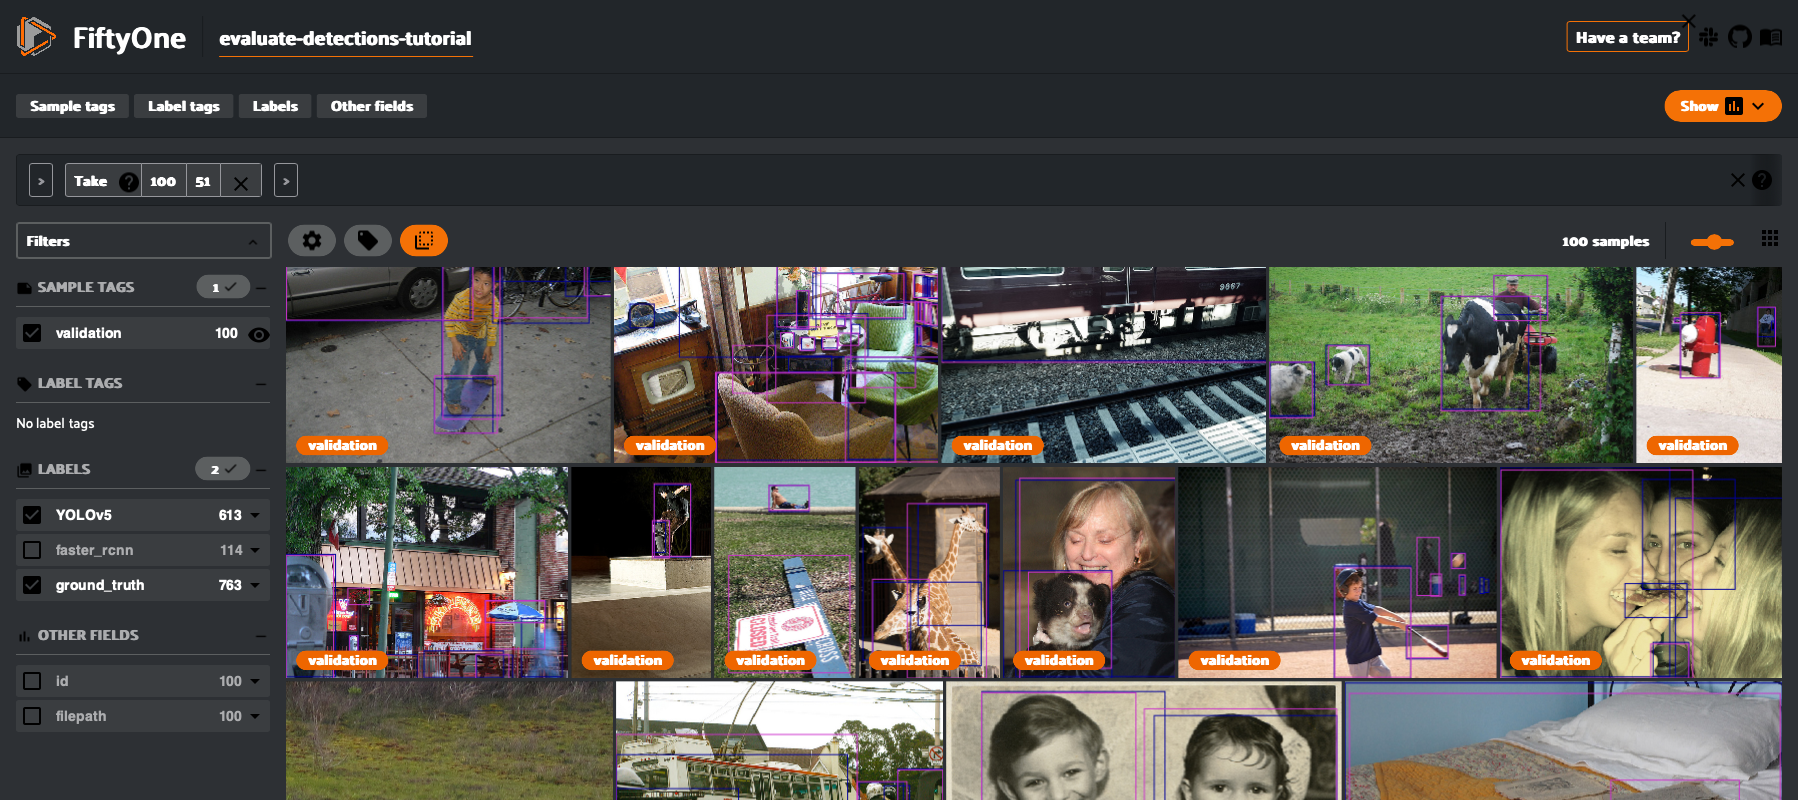

<IPython.core.display.Javascript object>

In [53]:
session.view = predictions_view

## Analyzing detections

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


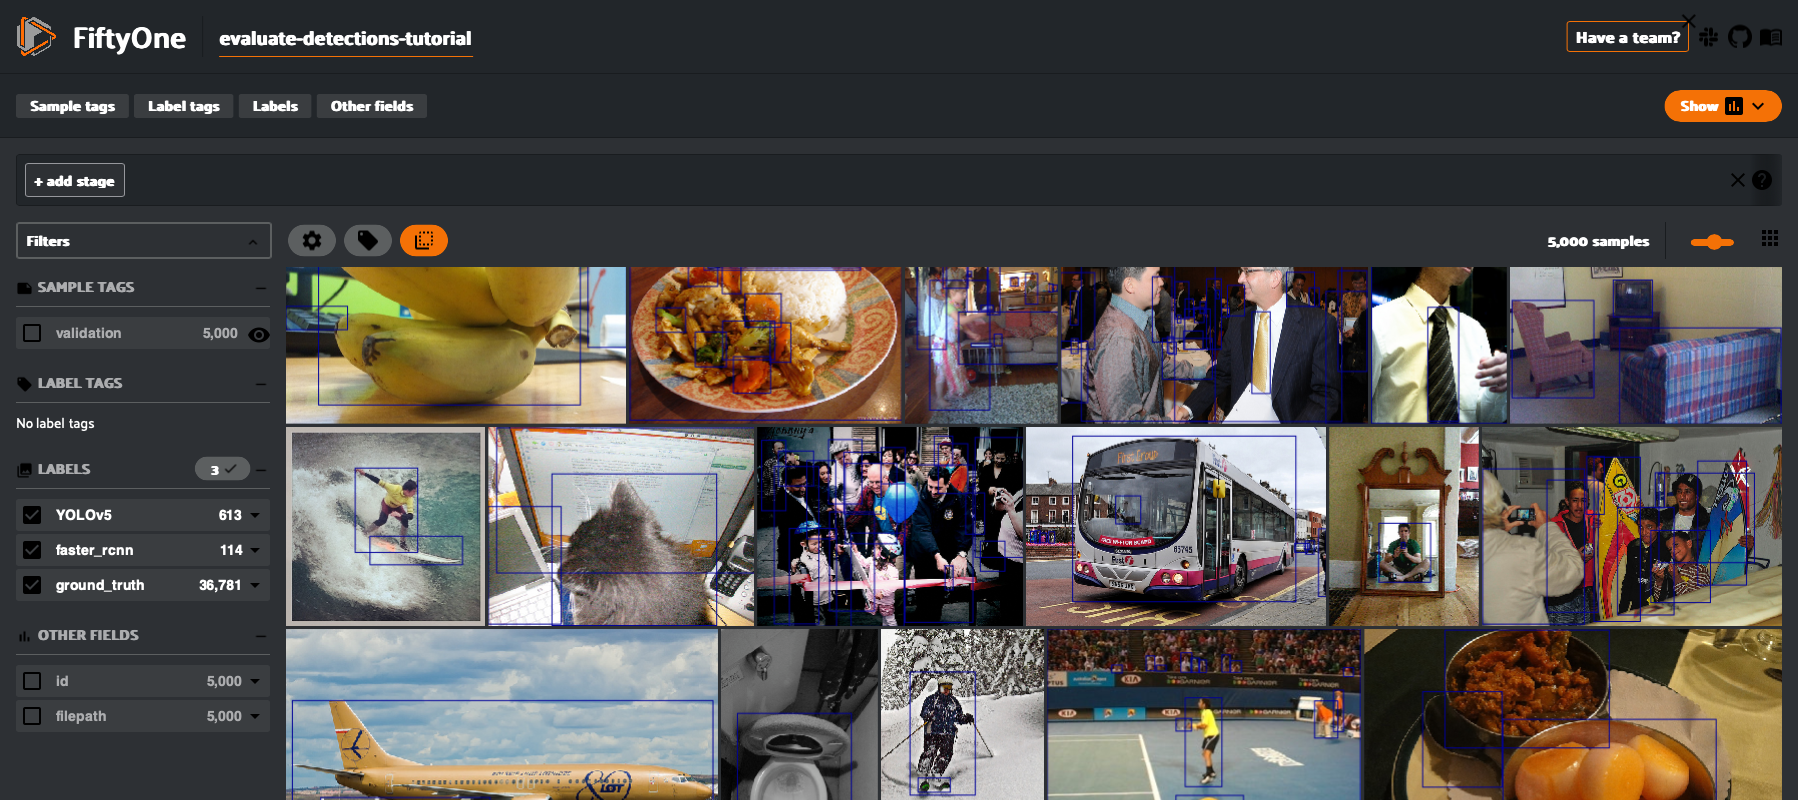

<IPython.core.display.Javascript object>

In [57]:
# Resets the session; the entire dataset will now be shown
session.view = None

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


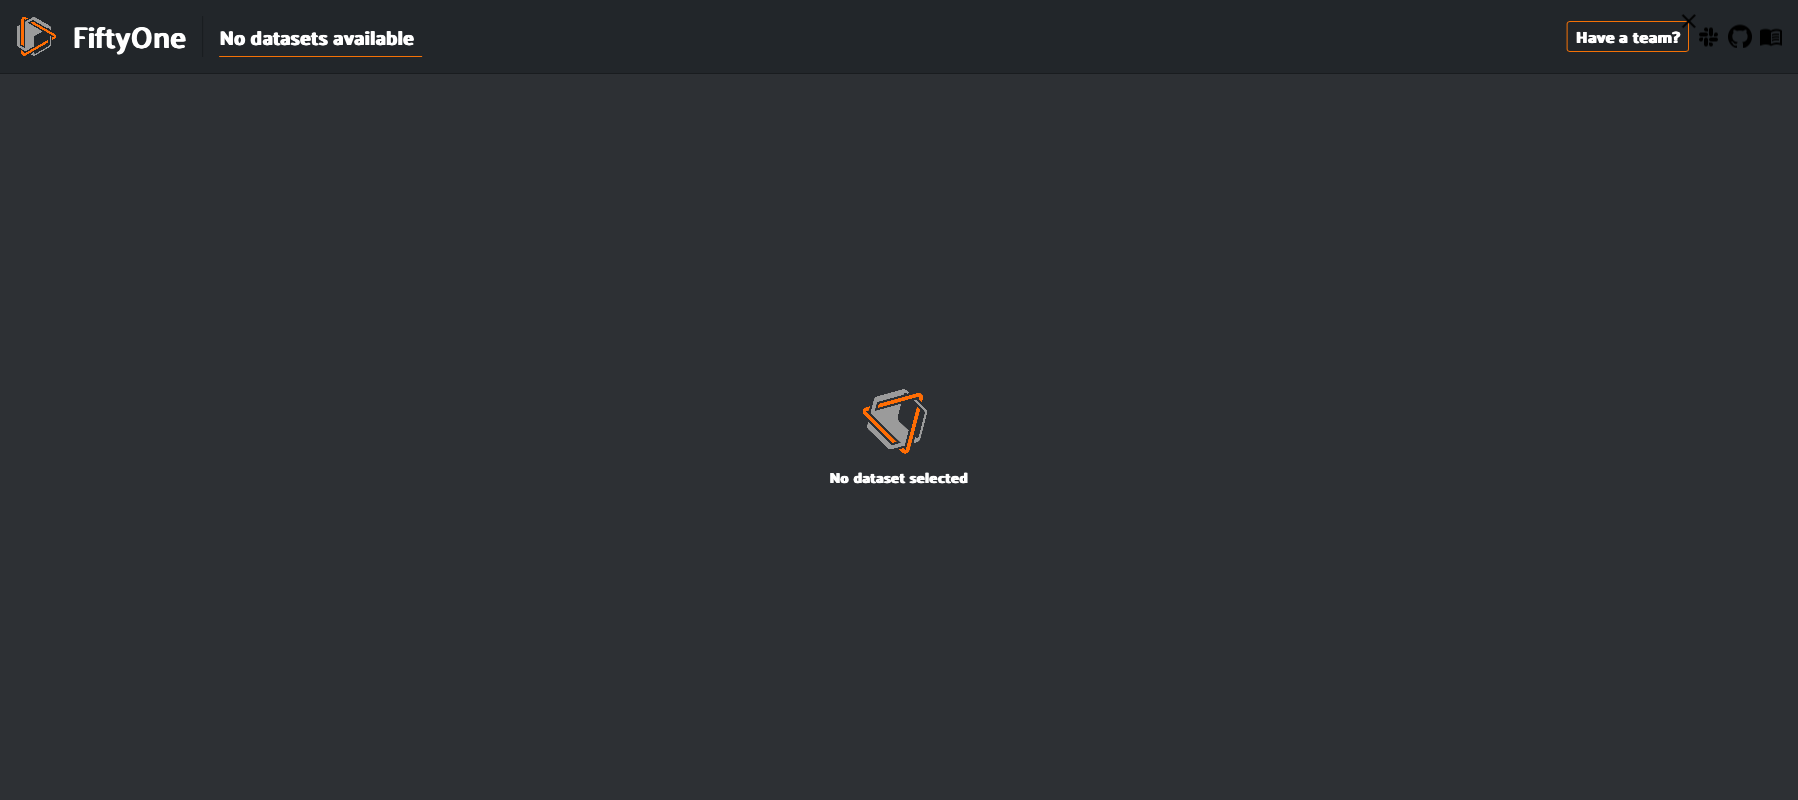

<IPython.core.display.Javascript object>

In [58]:
# Use the view bar to create an `Exists(faster_rcnn, True)` stage
# Now your view contains only the 100 samples with predictions in `faster_rcnn` field
session.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


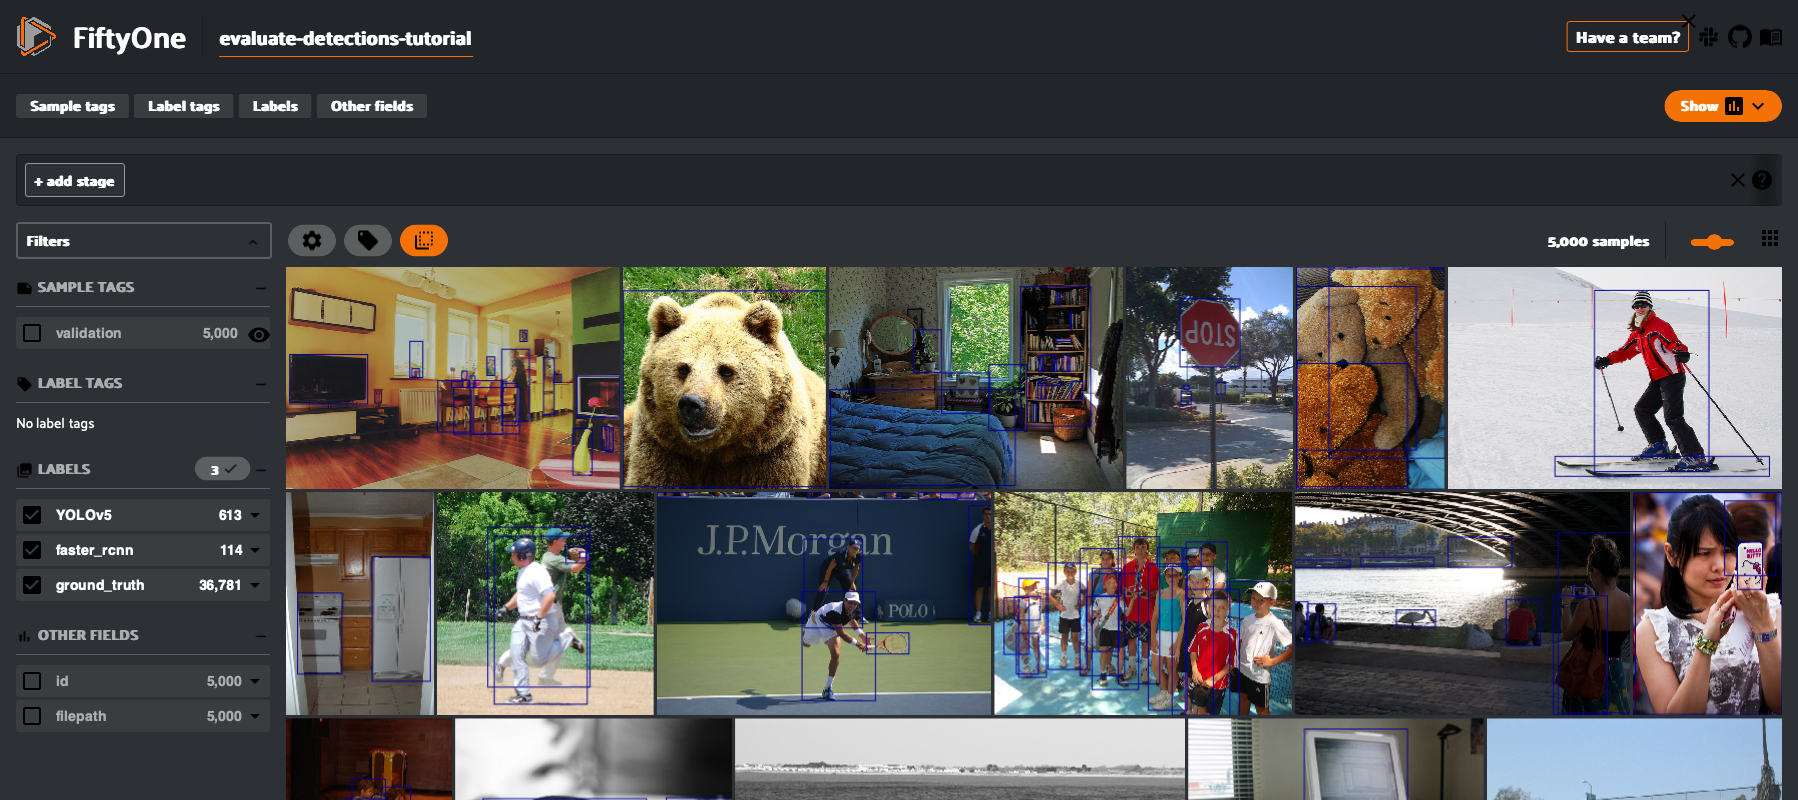

<IPython.core.display.Javascript object>

In [59]:
session.show()

In [ ]:
# Only contains detections with confidence >= 0.75
high_conf_view = predictions_view.filter_labels("faster_rcnn", F("confidence") > 0.75)

In [54]:
# Compute metadata so we can reference image height/width in our view
dataset.compute_metadata()

In [56]:
from fiftyone import ViewField as F
# Create an expression that will match objects whose bounding boxes have
# area less than 32^2 pixels
#
# Bounding box format is [top-left-x, top-left-y, width, height]
# with relative coordinates in [0, 1], so we multiply by image
# dimensions to get pixel area
#
bbox_area = (
    F("$metadata.width") * F("bounding_box")[2] *
    F("$metadata.height") * F("bounding_box")[3]
)
small_boxes = bbox_area < 32 ** 2

# Create a view that contains only small (and high confidence) predictions
small_boxes_view = high_conf_view.filter_labels("faster_rcnn", small_boxes)

session.view = small_boxes_view

NameError: ignored